In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
#o código começa aqui

#lendo o arquivo excel que será usado para todo o projeto

df = pd.read_excel('./Relatorio Leads x Mídia.xlsx')

In [ ]:
#visualizando o dataframe
df.head()

In [288]:
# tamanho do dataframe: 282 linhas por 43 colunas
df.shape

(282, 43)

In [287]:
# Todas as colunas do dataframe
df.columns

Index(['Nome', 'Telefone', 'Email', 'Referência', 'Status', 'Data do Cadastro',
       'Data da Atualização', 'Corretores', 'Observação', 'Mídia',
       'Data Nascimento', 'Tipo Pessoa', 'Rg', 'Cpf', 'Empresa', 'CNPJ',
       'Nacionalidade', 'Naturalidade', 'Profissão', 'Quantidades de Filhos',
       'Quantidades de Carros', 'Estado Civil', 'Renda', 'Marcadores', 'Radar',
       'Data último atendimento', 'Perfil - Finalidade', 'Perfil - Tipo',
       'Perfil - $Compra', 'Perfil - $Locação', 'Perfil - Referência',
       'Perfil - Dormitórios', 'Perfil - Área Total', 'Perfil - Bairros',
       'Perfil - Zona', 'Perfil - Cidade', 'Perfil - Suítes', 'Perfil - Vagas',
       'Atendimentos', 'Indicações', 'Visitas', 'Propostas', 'Fechamentos'],
      dtype='object')

In [ ]:
#exclui até a coluna Data do Cadastro
df1 = df.drop(df.loc[:, 'Nome':'Data do Cadastro'].columns, axis = 1)
df1

In [ ]:
#exclui até a coluna Observação
df2 = df1.drop(df.loc[:, 'Corretores':'Observação'].columns, axis = 1)
df2

In [ ]:
#exclui até a coluna Data último atendimento
df3 = df2.drop(df.loc[:, 'Data Nascimento':'Data último atendimento'].columns, axis = 1)
df3

In [ ]:
#exclui até a coluna Perfil - Vagas
df4 = df3.drop(df.loc[:, 'Perfil - $Compra':'Perfil - Vagas'].columns, axis = 1)
df4

In [ ]:
#exclui a coluna Indicações
df5 = df4.drop(['Indicações'], axis=1)
df5

In [289]:
# Dataframe pronto para fazer as análises. A primeira será: na coluna Mídia, qual é a mídia que mais aparece 
# e o gráfico de barras com todas as mídias

#Primeiro arrumar as colunas de "Perfil - Finalidade" e "Perfil - Tipo", pois só interessa a informação antes do traço

# "Perfil - Finalidade"
i=0
coluna_finalidade = df5["Perfil - Finalidade"].fillna(value='Não especificado') #tratar os NaN da coluna

for i, col in enumerate(coluna_finalidade):
    colFinalidade = col.split("-")[0]
    df5.loc[i,'Perfil - Finalidade'] = colFinalidade    

    
df5.head(32)

,Data da Atualização,Mídia,Perfil - Finalidade,Perfil - Tipo,Atendimentos,Visitas,Propostas,Fechamentos
0,2022-10-18,Captação,Residencial,Apartamento,7,0,1,0
1,2022-10-17,ZL Imóvel,Comercial,Salão,8,0,0,0
2,2022-10-17,Chaves Na Mão,Residencial,Sobrado,7,0,0,0
3,2022-10-14,ZL Imóvel,Comercial,Salão,10,0,0,0
4,2022-10-14,Captação,Residencial,Sobrado,7,0,0,0
5,2022-10-14,ZAP,Comercial,Sala,8,0,1,0
6,2022-10-14,Imovel Web,Comercial,Sala,9,0,0,0
7,2022-10-14,Imovel Web,Residencial,Apartamento,8,0,1,0
8,2022-10-14,ZAP,Comercial,Salão,9,1,1,0
9,2022-10-14,ZL Imóvel,Comercial,Galpão,6,0,0,0


In [290]:
#"Perfil - Tipo"
i=0
coluna_tipo = df5["Perfil - Tipo"].fillna(value='Não especificado')

for i, colTipo in enumerate(coluna_tipo):
    col = colTipo.split("-")[0]
    df5.loc[i:,'Perfil - Tipo'] = col
   
    
df5.head(40)

,Data da Atualização,Mídia,Perfil - Finalidade,Perfil - Tipo,Atendimentos,Visitas,Propostas,Fechamentos
0,2022-10-18,Captação,Residencial,Apartamento,7,0,1,0
1,2022-10-17,ZL Imóvel,Comercial,Salão,8,0,0,0
2,2022-10-17,Chaves Na Mão,Residencial,Sobrado,7,0,0,0
3,2022-10-14,ZL Imóvel,Comercial,Salão,10,0,0,0
4,2022-10-14,Captação,Residencial,Sobrado,7,0,0,0
5,2022-10-14,ZAP,Comercial,Sala,8,0,1,0
6,2022-10-14,Imovel Web,Comercial,Sala,9,0,0,0
7,2022-10-14,Imovel Web,Residencial,Apartamento,8,0,1,0
8,2022-10-14,ZAP,Comercial,Salão,9,1,1,0
9,2022-10-14,ZL Imóvel,Comercial,Galpão,6,0,0,0


In [294]:
import seaborn as sb
import random as rd
%matplotlib inline

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

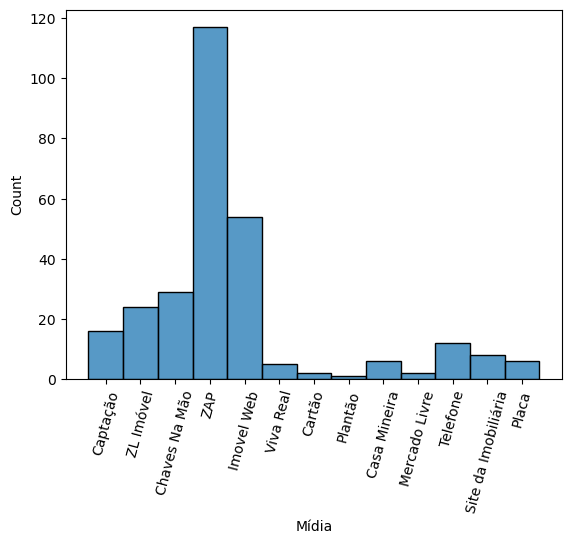

In [307]:
#Plotando gráfico das mídias
sb.histplot(df5['Mídia'],kde=False,bins=10)
plt.xticks(rotation=75)

In [335]:
# definindo a coluna Mídia como índice doo dataframe
df6 = df5.set_index(['Mídia']).sort_index(ascending=True)
#.sort_values(by='Perfil - Finalidade',ascending=True)
#df6.sort_values(ascending=False)
df6.head(30) 

,Data da Atualização,Perfil - Finalidade,Perfil - Tipo,Atendimentos,Visitas,Propostas,Fechamentos
Mídia,,,,,,,
Captação,2022-10-18,Residencial,Apartamento,7,0,1,0
Captação,2022-10-05,Comercial,Galpão,5,0,0,0
Captação,2022-10-10,Comercial,Galpão,7,0,0,0
Captação,2022-10-11,Residencial,Apartamento,7,0,0,0
Captação,2022-10-11,Não especificado,Não especificado,8,0,0,0
Captação,2022-10-14,Residencial,Apartamento,5,1,0,0
Captação,2022-10-04,Não especificado,Não especificado,5,1,0,0
Captação,2022-10-04,Comercial,Salão,10,0,0,0
Captação,2022-09-20,Residencial,Apartamento,4,0,0,0


In [320]:
df7 = df6.groupby(level = ['Perfil - Finalidade']) #['Perfil - Finalidade'])
df7

ValueError: level name Perfil - Finalidade is not the name of the index

In [ ]:
drinks_3 = drinks_3.groupby(level = 'consumo')
drinks_4 = drinks_4.groupby(level = ['consumo','continent'])
df.groupby(['Team', 'Position'])